In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

True

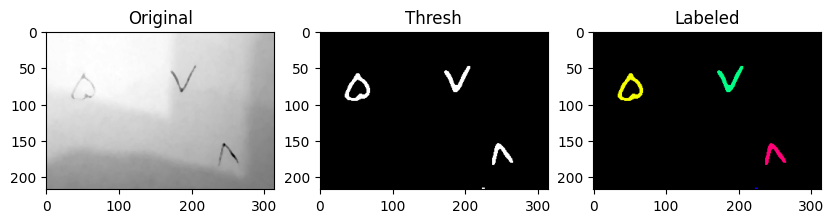

In [34]:
image = cv.imread(r"C:\Users\Asus\Downloads\adad.jpg",0)
image = cv.medianBlur(image,5)
img = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)

kernel = np.ones((3,3), 'uint8')
img = cv.dilate(img, kernel, iterations = 1)
img = cv.medianBlur(img, 7)
img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

_, label_8_connect = cv.connectedComponents(img, connectivity=8)

label_hue = np.uint8(179*label_8_connect/np.max(label_8_connect))

blank = np.ones_like(img) * 255
labeled_img = cv.merge([label_hue, blank, blank])

labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131);plt.imshow(image, cmap='gray');plt.title("Original")
plt.subplot(132);plt.imshow(img, cmap='gray');plt.title("Thresh")
plt.subplot(133);plt.imshow(labeled_img, cmap='gray');plt.title("Labeled")
cv.imwrite("labeled.jpg", labeled_img)

In [31]:
print(np.max(label_8_connect))

4
